<a href="https://colab.research.google.com/github/parulian-johannes/Tugas-Aplikasi-Regresi/blob/main/Tugas_Aplikasi_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Student_Performance.csv to Student_Performance (1).csv
Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4              

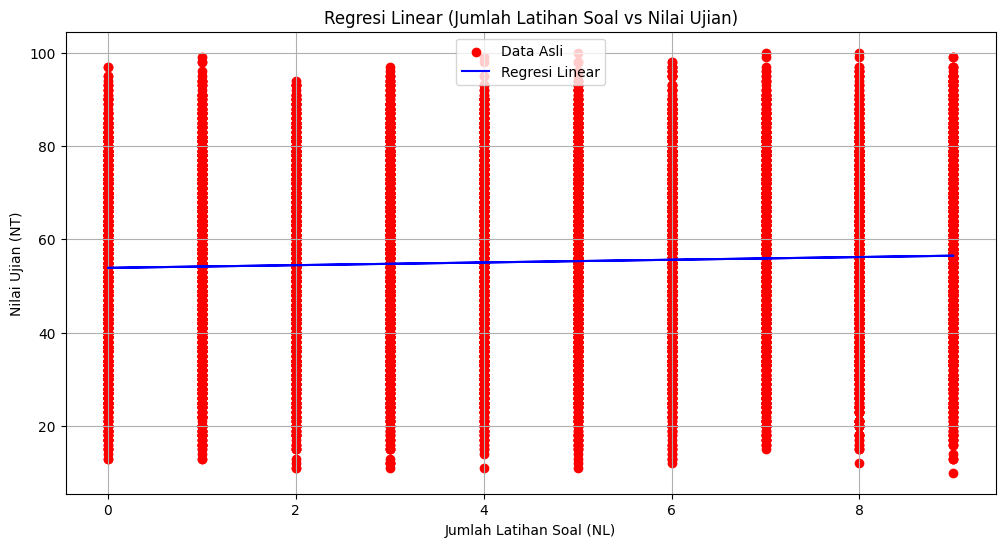

RMS untuk model linear (NL): 19.19360524526426


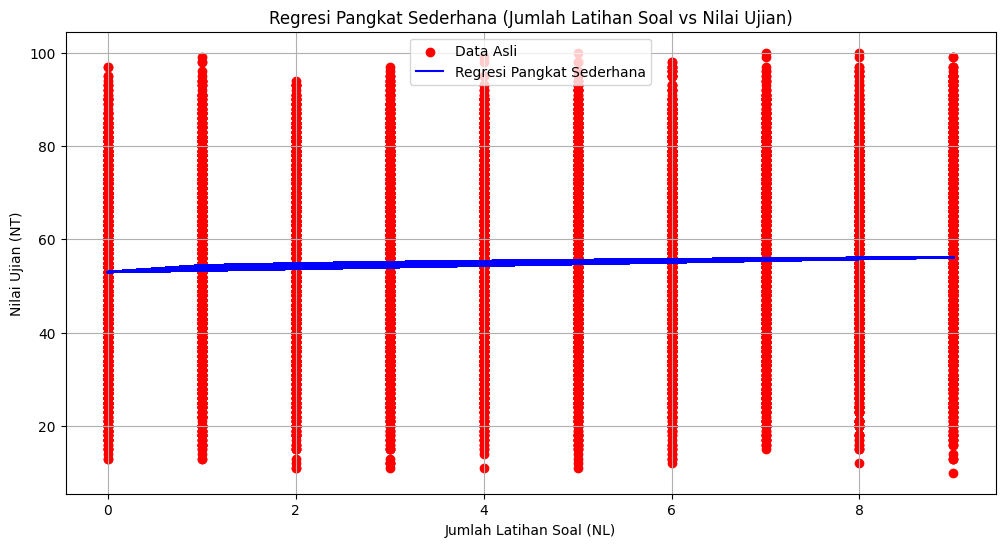

RMS untuk model pangkat sederhana (NL): 19.191028609770726


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from google.colab import files
import io

# Unggah file 'data.csv' ke Google Colab
uploaded = files.upload()

# Membaca data dari file yang diunggah dengan berbagai delimiter
file_name = next(iter(uploaded))

try:
    # Coba membaca dengan delimiter koma
    data = pd.read_csv(io.BytesIO(uploaded[file_name]), delimiter=',')
except pd.errors.ParserError:
    try:
        # Coba membaca dengan delimiter titik koma
        data = pd.read_csv(io.BytesIO(uploaded[file_name]), delimiter=';')
    except pd.errors.ParserError:
        # Jika gagal, tampilkan pesan kesalahan
        print("Error: Tidak dapat membaca file CSV dengan delimiter yang diharapkan.")
        raise

# Menampilkan nama kolom untuk memastikan kesesuaian
print(data.columns)
print(data.head())

# Memilih kolom yang relevan
# Menggunakan kolom sesuai dengan data yang diunggah dari Kaggle
# Kolom 'Sample Question Papers Practiced' untuk NL dan 'Performance Index' untuk NT
NL = data['Sample Question Papers Practiced'].values
NT = data['Performance Index'].values

# Model Linear (Metode 2)
X_NL = NL.reshape(-1, 1)
linear_model_NL = LinearRegression()
linear_model_NL.fit(X_NL, NT)
NT_pred_linear_NL = linear_model_NL.predict(X_NL)

# Plot hasil regresi linear
plt.figure(figsize=(12, 6))
plt.scatter(NL, NT, color='red', label='Data Asli')
plt.plot(NL, NT_pred_linear_NL, color='blue', label='Regresi Linear')
plt.title('Regresi Linear (Jumlah Latihan Soal vs Nilai Ujian)')
plt.xlabel('Jumlah Latihan Soal (NL)')
plt.ylabel('Nilai Ujian (NT)')
plt.legend()
plt.grid(True)
plt.show()

# Menghitung RMS untuk model linear (NL)
rms_linear_NL = np.sqrt(mean_squared_error(NT, NT_pred_linear_NL))
print(f'RMS untuk model linear (NL): {rms_linear_NL}')

# Model Pangkat Sederhana
def power_func(x, a, b, c):
    return a * np.power(x, b) + c

popt, _ = curve_fit(power_func, NL, NT)
NT_pred_power_NL = power_func(NL, *popt)

# Plot hasil regresi pangkat sederhana
plt.figure(figsize=(12, 6))
plt.scatter(NL, NT, color='red', label='Data Asli')
plt.plot(NL, NT_pred_power_NL, color='blue', label='Regresi Pangkat Sederhana')
plt.title('Regresi Pangkat Sederhana (Jumlah Latihan Soal vs Nilai Ujian)')
plt.xlabel('Jumlah Latihan Soal (NL)')
plt.ylabel('Nilai Ujian (NT)')
plt.legend()
plt.grid(True)
plt.show()

# Menghitung RMS untuk model pangkat sederhana (NL)
rms_power_NL = np.sqrt(mean_squared_error(NT, NT_pred_power_NL))
print(f'RMS untuk model pangkat sederhana (NL): {rms_power_NL}')
